---
title: Data Screening
description: Screening and filtering of the IGN earthquake data to La Palma events only
authors:
  - userId: fI5cWFyZPEZCTpIHdqX5H8OU3Iv1
    name: Steve Purves
    orcid: 0000-0002-0760-5497
    corresponding: false
    roles: []
    affiliations: []
date: '2022-06-26T20:21:12.517Z'
name: data-screening-pandas
oxa: oxa:1Bk7uPlcMuaTyKEshESj/w7dhgP7jr4IrWGyDQYfZ
tags: []
thumbnail: thumbnails/data-screening-pandas.png
---

## Data Screening

Load and review the data, check that dates are loaded properly and filter data down to the events in La Palma only. The dataset itself contains all recent IGN earthquake data for Spanish territory.

In [1]:
import pandas as pd
from igndata import load
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv('../catalogoComunSV_1653337721482.csv', sep=';', parse_dates=[1])
df.columns = ['Event', 'Date', 'Time', 'Latitude', 'Longitude', 'Depth(km)', 'Intensity','Magnitude', 'Type Mag', 'Location']
df['Time'] = df['Time'].str.strip()
df = df.sort_values(by=['Date', 'Time'], ascending=[False,False])
df.head()

,Event,Date,Time,Latitude,Longitude,Depth(km),Intensity,Magnitude,Type Mag,Location
61352,es2022jhfjk,2022-12-05,23:48:14,35.6536,-3.6117,0.0,,2.3,4,ALBORÁN SUR
61351,es2022jhaqg,2022-12-05,21:24:28,29.1847,-16.1122,36.0,,2.9,4,ATLÁNTICO-CANARIAS
61350,es2022jgwyj,2022-12-05,19:32:55,35.3964,-3.6272,29.0,,2.4,4,ALBORÁN SUR
61349,es2022jgvip,2022-12-05,18:44:13,28.6041,-17.8660,4.0,II,2.0,4,S EL PASO.ILP
61348,es2022jguku,2022-12-05,18:16:27,35.4665,-3.6785,7.0,,2.4,4,ALBORÁN SUR


In [118]:
df.describe()

,Latitude,Longitude,Depth(km),Magnitude,Type Mag
count,61727.000000,61727.000000,61727.000000,61727.000000,61727.000000
mean,35.055860,-7.907882,11.076586,1.893217,4.033826
std,5.149824,7.002410,11.341663,0.758064,0.302207
min,26.349300,-19.930400,0.000000,-0.500000,3.000000
25%,28.566800,-16.641900,2.000000,1.400000,4.000000
50%,36.339300,-3.955300,10.000000,1.800000,4.000000
75%,37.902850,-3.210700,14.000000,2.400000,4.000000
max,44.985000,5.996600,144.000000,6.300000,6.000000


<Figure size 864x864 with 0 Axes>

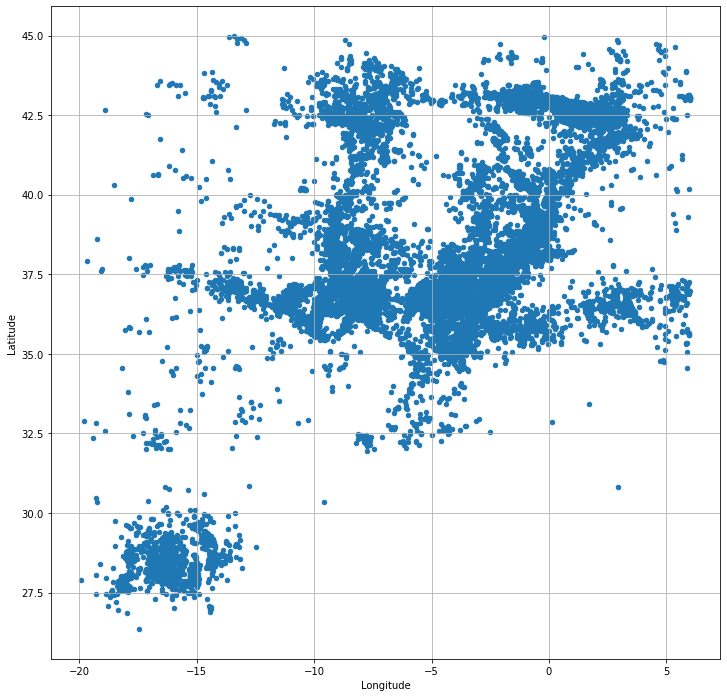

In [119]:
plt.figure(figsize=(12,12))
ax = df.plot.scatter(x="Longitude", y="Latitude", figsize=(12,12), grid="on")

### Filter down to La Palma events only
Also some rows seem to be missing depth measurements, (see differences in the **count** for columns above) - take only rows with valid depths

In [120]:
df = df[(df['Latitude'] < 28.7) & (df['Latitude'] > 28.3) & (df['Longitude'] < -17.7) & (df['Longitude'] > -18)]
df = df[df['Depth(km)'].notna()]
df.describe()

,Latitude,Longitude,Depth(km),Magnitude,Type Mag
count,10852.000000,10852.000000,10852.000000,10852.000000,10852.0
mean,28.568395,-17.842903,14.275230,2.485726,4.0
std,0.021068,0.026674,8.723356,0.667110,0.0
min,28.310200,-17.995800,0.000000,0.200000,4.0
25%,28.558100,-17.851700,10.200000,2.000000,4.0
50%,28.563900,-17.838100,11.300000,2.600000,4.0
75%,28.573400,-17.829300,13.900000,2.900000,4.0
max,28.697800,-17.705700,46.900000,5.100000,4.0


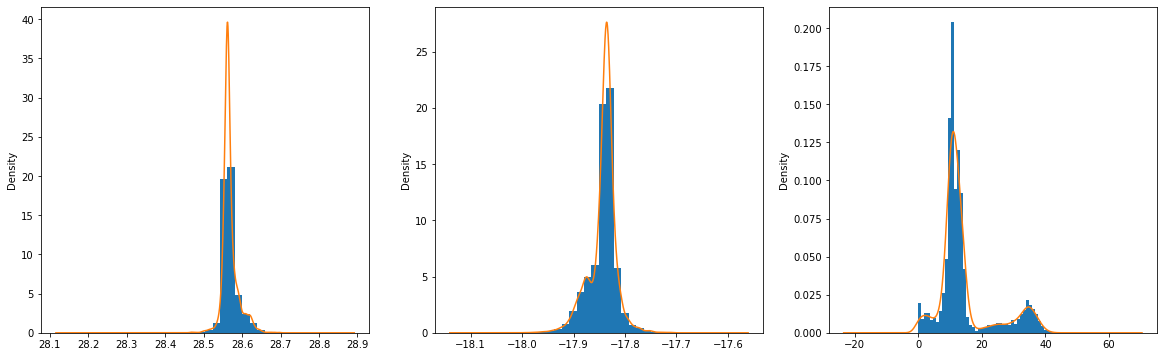

In [121]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df["Latitude"].plot.hist(bins=20, density=True)
df["Latitude"].plot.kde()
plt.subplot(1,3,2)
df["Longitude"].plot.hist(bins=20, density=True)
df["Longitude"].plot.kde()
plt.subplot(1,3,3)
df["Depth(km)"].plot.hist(bins=50, density=True)
_=df["Depth(km)"].plot.kde()

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


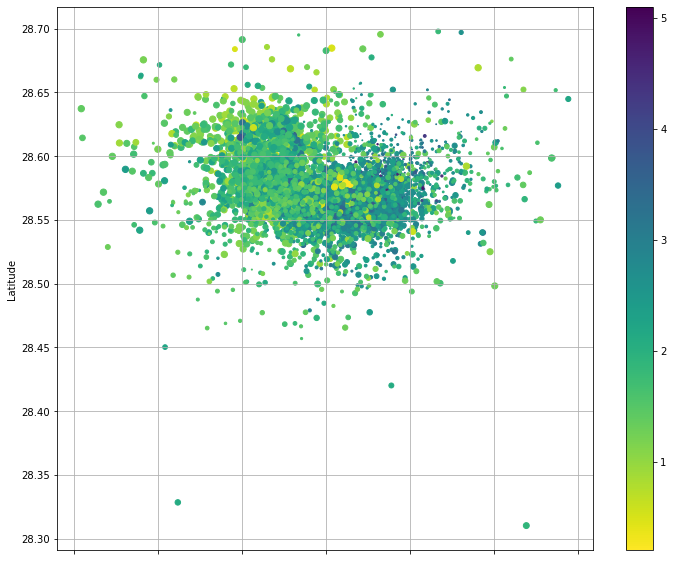

In [122]:
from matplotlib import cm
cmap = cm.get_cmap('viridis_r')
ax = df.plot.scatter(x="Longitude", y="Latitude", s=40-df["Depth(km)"], c=df["Magnitude"], figsize=(12,10), grid="on", cmap=cmap)
# ax.set_ylim((28.4, 28.9))
# ax.set_xlim((-18, -17.75))

In [58]:
df['Swarm'] = 0
df.loc[(df['Date'] >= '2017-10-01') & (df['Date'] <= '2017-10-31'), 'Swarm'] = 1
df.loc[(df['Date'] >= '2019-02-01') & (df['Date'] <= '2019-02-28'), 'Swarm'] = 2
df.loc[(df['Date'] >= '2020-07-21') & (df['Date'] <= '2020-08-05'), 'Swarm'] = 3
df.loc[(df['Date'] >= '2020-10-04') & (df['Date'] <= '2020-10-10'), 'Swarm'] = 4
df.loc[(df['Date'] >= '2020-10-11') & (df['Date'] <= '2020-10-22'), 'Swarm'] = 5
df.loc[(df['Date'] >= '2020-11-15') & (df['Date'] <= '2020-11-29'), 'Swarm'] = 6
df.loc[(df['Date'] >= '2020-12-10') & (df['Date'] <= '2020-12-29'), 'Swarm'] = 7
df.loc[(df['Date'] >= '2020-12-10') & (df['Date'] <= '2020-12-31'), 'Swarm'] = 8
df.loc[(df['Date'] >= '2021-01-15') & (df['Date'] <= '2021-02-07'), 'Swarm'] = 9
df.loc[(df['Date'] >= '2021-06-01') & (df['Date'] <= '2021-06-30'), 'Swarm'] = 10
df.loc[(df['Date'] >= '2021-07-01'), 'Swarm'] = 11


df['Phase'] = 0;
df.loc[(df['Date'] >= '2021-09-11') & (df['Date'] <= '2021-09-23'), 'Phase'] = 1
df.loc[(df['Date'] >= '2021-09-24') & (df['Date'] <= '2021-11-09'), 'Phase'] = 2
df.loc[(df['Date'] >= '2021-11-10') & (df['Date'] <= '2021-12-01'), 'Phase'] = 3
df.loc[(df['Date'] >= '2021-12-02') & (df['Date'] <= '2021-12-13'), 'Phase'] = 4
df.loc[(df['Date'] >= '2021-12-14'), 'Phase'] = 5

In [59]:
df.to_csv("./lapalma_update.csv", index=False)